## Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf 




In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/9a7d477bbed852e752101fe85ac928200ae7ebd5/data/aapl_1d_train.csv")
data.dropna(inplace=True)

In [3]:
# To create values of  (X) y label (Y)
X = pd.DataFrame()
X["Pt"] = data.Close
for i in range(1, 31):  #This code creates the columns that represent the previous days desired
    X[f"Pt_{i}"] = data.Close.shift(i)
Y = data.Close.shift(-1)

In [4]:

X = X.iloc[30:-1]
Y = Y.iloc[30:-1]

# Split train and test
split = int(0.8 * len(X))
X_train, X_test = X.iloc[:split], X.iloc[split:]
Y_train, Y_test = Y.iloc[:split], Y.iloc[split:]

In [5]:

# Build the LSTM model
model = Sequential([
    LSTM(units=256, return_sequences=True, input_shape=(31, 1)),
    LSTM(units=128),
    Dense(units=1)
])



c:\Users\erick\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss="mse", metrics=['root_mean_squared_error'])

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train.values.reshape(-1, 31, 1), Y_train, epochs=100, validation_split=0.2, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - loss: 47894.8008 - root_mean_squared_error: 218.8070 - val_loss: 73318.5391 - val_root_mean_squared_error: 278.3920
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 46925.3320 - root_mean_squared_error: 216.6001 - val_loss: 70449.7344 - val_root_mean_squared_error: 273.0109
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 42962.9805 - root_mean_squared_error: 207.2451 - val_loss: 67919.6953 - val_root_mean_squared_error: 268.1696
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 44993.8984 - root_mean_squared_error: 211.9461 - val_loss: 65567.7969 - val_root_mean_squared_error: 263.5838
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - loss: 42964.9648 - root_mean_squared_error: 207.1953 - val_loss: 63369.0625 - val_root_mean_squared_error: 259.2175
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 42800.3008 - root_mean_squared_error: 206.7422 - val_loss: 61346.0742 - val_root_me

In [8]:
# Make predictions
train_predictions = model.predict(X_train.values.reshape(-1, 31, 1))
test_predictions = model.predict(X_test.values.reshape(-1, 31, 1))


132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [9]:
# Plotting the results
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
predicted_prices = np.concatenate([train_predictions, test_predictions])

# Prediction
fig.add_trace(go.Scatter(x=data.index, y=predicted_prices.flatten(), mode='lines', name='Predicted Price',line=dict(color='blue')))

# Labels
fig.update_layout(title='Stock Price Prediction using LSTM',
                   xaxis_title='Time',
                   yaxis_title='Stock Price',
                   showlegend=True,
                   legend=dict(x=0, y=1))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [10]:
data_test=pd.read_csv('https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/9a7d477bbed852e752101fe85ac928200ae7ebd5/data/aapl_1d_test.csv')
data_test.dropna(inplace=True)

In [19]:
X=pd.DataFrame()
X["Pt"] = data_test.Close
for i in range(1, 31):  # Generar características para desplazamientos de 1 a 30 días
    X[f"Pt_{i}"] = data_test.Close.shift(i)
Y = data_test.Close.shift(-1)
X_test=X

In [20]:
Y=data_test.Close.shift(-1)
Y.head(10)

0    131.01
1    126.60
2    130.92
3    132.05
4    128.98
5    128.80
6    130.89
7    128.91
8    127.14
9    127.83
Name: Close, dtype: float64

In [21]:
test_predictions = model.predict(X_test.values.reshape(-1, 31, 1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step


In [22]:
# Plot
fig = go.Figure(data=[go.Candlestick(x=data_test.index,
                open=data_test['Open'],
                high=data_test['High'],
                low=data_test['Low'],
                close=data_test['Close'])])

# Prediction
fig.add_trace(go.Scatter(x=data_test.index, y=test_predictions.flatten(), mode='lines', name='Predicted Price',line=dict(color='blue')))

# Labels
fig.update_layout(title='Stock Price Prediction using LSTM',
                   xaxis_title='Time',
                   yaxis_title='Stock Price',
                   showlegend=True,
                   legend=dict(x=0, y=1))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [15]:
from tensorflow.keras import models
# Save the Keras model
models.save_model(model, 'model.h5')



In [16]:
# Guardar el modelo con pickle
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

NameError: name 'scaler' is not defined

In [ ]:
# Cargar el modelo con pickle y guardarlo en una variable
with open('scaler.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Initialize the portfolio
portfolio_value = 100000  # Initial portfolio value
cash = portfolio_value
stock = 0
history = []  # To keep track of buy/sell/hold actions

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import pickle

# Supongamos que 'data_train' y 'data_test' son tus datos de entrenamiento y prueba respectivamente

# Entrenar un nuevo modelo
X_train = np.arange(len(data)).reshape(-1, 1)
y_train = data.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

# Guardar el modelo entrenado con pickle
with open('modelo_LSTM.sav', 'wb') as f:
    pickle.dump(model, f)

# Cargar el escalador previamente guardado con pickle
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Definir otras variables necesarias para el backtesting
time_steps = 10  # Definir el número de pasos de tiempo
cash = 1000000  # Definir el efectivo inicial
stock = 0  # Definir el número de acciones inicial
portfolio_value = cash  # Definir el valor del portafolio inicial
history = []  # Crear una lista para almacenar el historial de acciones
take_profit = 1.05  # Definir el take profit
stop_loss = 0.97  # Definir el stop loss
buying_price = 0  # Inicializar el precio de compra

# Realizar predicciones y ejecutar el backtesting
for i in range(len(data_test) - time_steps):
    # Preparar los datos de prueba y escalarlos
    X_test_reshaped = data_test[i:i+time_steps].reshape(-1, 1)
    X_test_scaled = scaler.transform(X_test_reshaped)
    
    # Predecir el precio del siguiente día
    predicted_price_scaled = model.predict(np.array([[i+time_steps]]))  # Use the same shape as during training
    predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    
    # Obtener el precio actual del siguiente día
    actual_price = data_test[i+time_steps]
    # Decidir comprar, vender o mantener
    if predicted_price > actual_price:  # Si el modelo predice que el precio subirá
        if cash > 0:
            # Comprar solo el 5% del valor del portafolio
            buy_value = min(cash, portfolio_value * 0.01)
            stock += buy_value / actual_price
            cash -= buy_value
            action = 'Buy'
            buying_price = actual_price
    elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # Si el modelo predice que el precio bajará o se alcanza el take profit o stop loss
        if stock > 0:
            # Vender solo el 5% del valor del portafolio
            sell_value = min(stock * actual_price, portfolio_value * 0.01)
            stock -= sell_value / actual_price
            cash += sell_value
            action = 'Sell'
    else:
        action = 'Hold'
    
    # Calcular el valor del portafolio
    portfolio_value = cash + stock * actual_price
    
    # Guardar la acción en el historial
    history.append({
        'Day': i,
        'Action': action,
        'Cash': cash,
        'Stock': stock,
        'Portfolio Value': portfolio_value
    })

# Convertir el historial en un DataFrame
df_history = pd.DataFrame(history)

In [ ]:
df_history

,Day,Action,Cash,Stock,Portfolio Value
0,0,Buy,990000.0,[7797.559868441347],[1000000.0]
1,1,Buy,[0.0],[7797.559868441347],[1000328.5613705703]
2,2,Buy,[0.0],[7797.559868441347],[1001073.772587972]
3,3,Buy,[0.0],[7797.559868441347],[1001573.2942365706]
4,4,Buy,[0.0],[7797.559868441347],[1002724.5933856912]
...,...,...,...,...,...
738,738,Buy,[0.0],[7797.559868441347],[1509607.5905302449]
739,739,Buy,[0.0],[7797.559868441347],[1505318.932602602]
740,740,Buy,[0.0],[7797.559868441347],[1506098.6885894462]
741,741,Buy,[0.0],[7797.559868441347],[1509451.639332876]


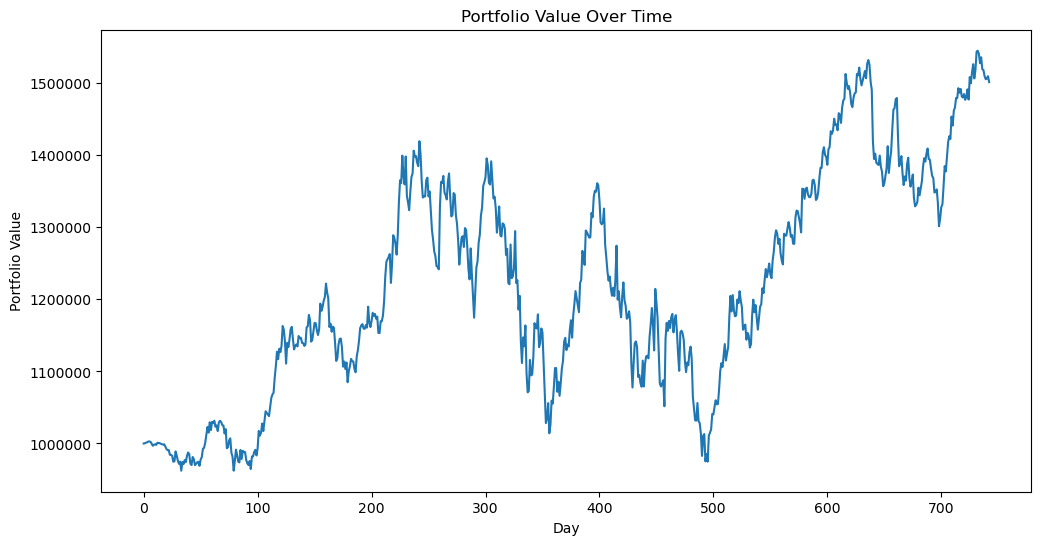

In [ ]:
from matplotlib.ticker import FuncFormatter
# Define a function to format y values
def y_fmt(x, pos):
    return '{:0.0f}'.format(x)

# Create a formatter
formatter = FuncFormatter(y_fmt)

fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(formatter)
ax.plot(df_history['Day'], df_history['Portfolio Value'])
ax.set_title('Portfolio Value Over Time')
ax.set_xlabel('Day')
ax.set_ylabel('Portfolio Value')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pickle

# Supongamos que 'data_train' y 'data_test' son tus datos de entrenamiento y prueba respectivamente

# Cargar el modelo previamente entrenado
model = load_model('model.h5')

# Cargar el escalador previamente guardado con pickle
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Definir otras variables necesarias para el backtesting
time_steps = 10  # Definir el número de pasos de tiempo
cash = 10000  # Definir el efectivo inicial
stock = 0  # Definir el número de acciones inicial
portfolio_value = cash  # Definir el valor del portafolio inicial
history = []  # Crear una lista para almacenar el historial de acciones
take_profit = 1.05  # Definir el take profit
stop_loss = 0.95  # Definir el stop loss
buying_price = 0  # Inicializar el precio de compra

# Realizar predicciones y ejecutar el backtesting
for i in range(len(data_test) - time_steps):
    # Preparar los datos de prueba y escalarlos
    X_test_reshaped = data_test[i:i+time_steps].reshape(-1, 1)
    X_test_scaled = scaler.transform(X_test_reshaped)
    
    # Predecir el precio del siguiente día
    predicted_price_scaled = model.predict(np.array([X_test_scaled]))  # Use the same shape as during training
    predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))[0][0]
    
    # Obtener el precio actual del siguiente día
    actual_price = data_test[i+time_steps]
    # Decidir comprar, vender o mantener
    if predicted_price > actual_price:  # Si el modelo predice que el precio subirá
        if cash > 0:
            # Comprar solo el 5% del valor del portafolio
            buy_value = min(cash, portfolio_value * 0.05)
            stock += buy_value / actual_price
            cash -= buy_value
            action = 'Buy'
            buying_price = actual_price
    elif predicted_price < actual_price or actual_price >= buying_price * take_profit or actual_price <= buying_price * stop_loss:  # Si el modelo predice que el precio bajará o se alcanza el take profit o stop loss
        if stock > 0:
            # Vender solo el 5% del valor del portafolio
            sell_value = min(stock * actual_price, portfolio_value * 0.05)
            stock -= sell_value / actual_price
            cash += sell_value
            action = 'Sell'
    else:
        action = 'Hold'
    
    # Calcular el valor del portafolio
    portfolio_value = cash + stock * actual_price
    
    # Guardar la acción en el historial
    history.append({
        'Day': i,
        'Action': action,
        'Cash': cash,
        'Stock': stock,
        'Portfolio Value': portfolio_value
    })

# Convertir el historial en un DataFrame
df_history = pd.DataFrame(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [ ]:
df_history

,Day,Action,Cash,Stock,Portfolio Value
0,0,Buy,9500.0,[71.40117317840951],[10000.0]
1,1,Sell,[0.0],[71.40117317840951],[10016.428068528514]
2,2,Sell,[0.0],[71.40117317840951],[10017.030294171762]
3,3,Sell,[0.0],[71.40117317840951],[10017.030294171762]
4,4,Sell,[0.0],[71.40117317840951],[10017.030294171762]
...,...,...,...,...,...
738,738,Buy,[0.0],[71.40117317840951],[13823.267127340081]
739,739,Buy,[0.0],[71.40117317840951],[13783.996482091956]
740,740,Buy,[0.0],[71.40117317840951],[13791.136599409796]
741,741,Buy,[0.0],[71.40117317840951],[13821.839103876513]


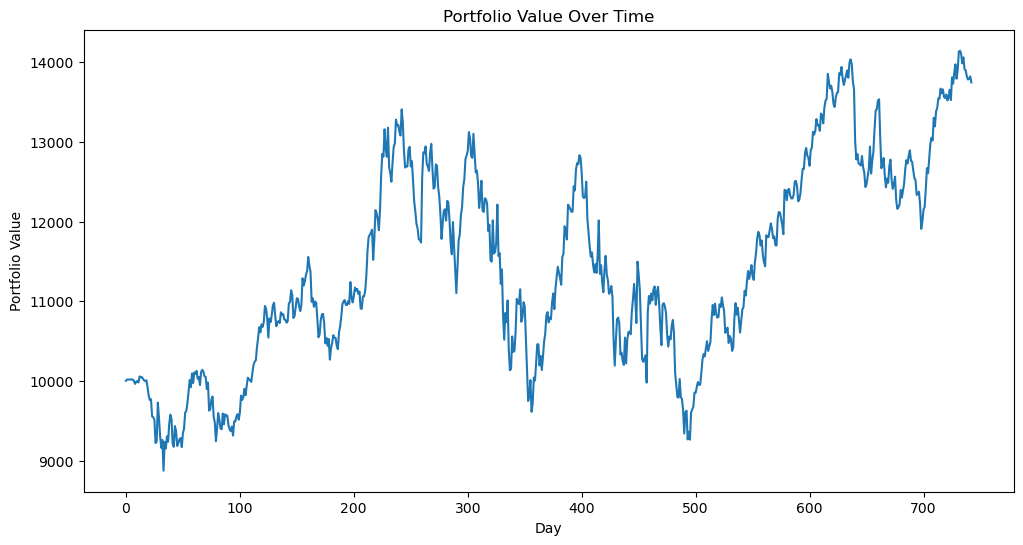

In [ ]:
# Graficar el valor del portafolio a lo largo del tiempo
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Definir una función para formatear los valores de y
def y_fmt(x, pos):
    return '{:0.0f}'.format(x)

# Crear un formateador
formatter = FuncFormatter(y_fmt)

fig, ax = plt.subplots(figsize=(12, 6))
ax.yaxis.set_major_formatter(formatter)
ax.plot(df_history['Day'], df_history['Portfolio Value'])
ax.set_title('Portfolio Value Over Time')
ax.set_xlabel('Day')
ax.set_ylabel('Portfolio Value')
plt.show()
